**Universidad Internacional de La Rioja (UNIR) - Máster Universitario en Inteligencia Artificial - Procesamiento del Lenguaje Natural** 

***
Datos del alumno (Nombre y Apellidos): Eduard Felipe Ortegón Correa

Fecha: 25/11/2024
***

<span style="font-size: 20pt; font-weight: bold; color: #0098cd;">Trabajo: Named-Entity Recognition</span>

**Objetivos** 

Con esta actividad se tratará de que el alumno se familiarice con el manejo de la librería spacy, así como con los conceptos básicos de manejo de las técnicas NER

**Descripción**

En esta actividad debes procesar de forma automática un texto en lenguaje natural para detectar características básicas en el mismo, y para identificar y etiquetar las ocurrencias de conceptos como localización, moneda, empresas, etc.

En la primera parte del ejercicio se proporciona un código fuente a través del cual se lee un archivo de texto y se realiza un preprocesado del mismo. En esta parte el alumno tan sólo debe ejecutar y entender el código proporcionado.

En la segunda parte del ejercicio se plantean una serie de preguntas que deben ser respondidas por el alumno. Cada pregunta deberá responderse con un fragmento de código fuente que esté acompañado de la explicación correspondiente. Para elaborar el código solicitado, el alumno deberá visitar la documentación de la librería spacy, cuyos enlaces se proporcionarán donde corresponda.

# Parte 1: carga y preprocesamiento del texto a analizar

Observa las diferentes librerías que se están importando.

In [2]:
!python -m install spacy
!python -m spacy download es_core_news_md
!python -m pip install --upgrade pip


c:\Users\DANIE\AppData\Local\Programs\Python\Python312\python.exe: No module named install


     ---------------------------------------- 0.0/42.3 MB ? eta -:--:--
     --- ------------------------------------ 3.4/42.3 MB 16.7 MB/s eta 0:00:03
     ---- ----------------------------------- 5.0/42.3 MB 12.6 MB/s eta 0:00:03
     ------ --------------------------------- 6.8/42.3 MB 11.0 MB/s eta 0:00:04
     -------- ------------------------------- 9.4/42.3 MB 11.1 MB/s eta 0:00:03
     ----------- --------------------------- 12.6/42.3 MB 11.8 MB/s eta 0:00:03
     -------------- ------------------------ 16.0/42.3 MB 12.6 MB/s eta 0:00:03
     ----------------- --------------------- 19.1/42.3 MB 12.8 MB/s eta 0:00:02
     -------------------- ------------------ 21.8/42.3 MB 12.7 MB/s eta 0:00:02
     ---------------------- ---------------- 24.4/42.3 MB 12.8 MB/s eta 0:00:02
     ------------------------- ------------- 27.5/42.3 MB 12.9 MB/s eta 0:00:02
     ---------------------------- ---------- 30.7/42.3 MB 13.1 MB/s eta 0:00:01
     ------------------------------ -------- 33.

In [3]:

import spacy
import pandas as pd
from spacy import displacy
import es_core_news_md
import sys
!{sys.executable} -m pip install pandas openpyxl
import pandas as pd



El siguiente código simplemente carga y preprocesa el texto. Para ello, lo primero que hace es cargar un modelo de lenguaje previamente entrenado. En este caso, se utiliza <i>es_core_news_md</i>: 

https://spacy.io/models/es#es_core_news_md


In [4]:
nlp = es_core_news_md.load()
nlp

El objeto <i>nlp</i> permite utilizar el modelo de lenguaje cargado, de forma que se puede procesar un texto y obtenerlo en su versión preprocesada. Así, nos permite realizar las diferentes tareas. En este caso, vamos a utilizar el pipeline para hacer un preprocesamiento básico, que consiste en tokenizar el texto.

In [5]:


filename = "./comentariosOdio.csv"
lines_number = 20

data = pd.read_csv(filename, delimiter=";", nrows=lines_number)
data

,MEDIO,SOPORTE,URL,TIPO DE MENSAJE,CONTENIDO A ANALIZAR,INTENSIDAD,TIPO DE ODIO,TONO HUMORISTICO,MODIFICADOR,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,EL PAÍS,WEB,https://elpais.com/deportes/2021-01-20/alcoyan...,COMENTARIO,el barça nunca acaeza ante un segundo b ni ant...,3.0,Otros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EL PAÍS,WEB,https://elpais.com/deportes/2021-01-20/alcoyan...,COMENTARIO,el real madrid ha puesto punto y final a su an...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EL PAÍS,WEB,https://elpais.com/espana/2021-01-18/comienza-...,COMENTARIO,cristina cifuentes podría haber sido la presid...,3.0,Ideológico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EL PAÍS,WEB,https://elpais.com/espana/2021-01-18/comienza-...,COMENTARIO,habría que reabrir el caso. el supremo se dedi...,3.0,Ideológico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EL PAÍS,WEB,https://elpais.com/espana/2021-01-18/comienza-...,COMENTARIO,me parece un poco exagerado pedir más de tres ...,3.0,Ideológico,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,EL PAÍS,WEB,https://elpais.com/espana/2021-01-18/comienza-...,COMENTARIO,parece que todos los delincuentes niegan las e...,3.0,Ideológico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,EL PAÍS,WEB,https://elpais.com/espana/2021-01-18/comienza-...,COMENTARIO,"preguntárselo al fracasado, media carrera en 6...",4.0,Ideológico,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,EL PAÍS,WEB,https://elpais.com/espana/2021-01-18/comienza-...,COMENTARIO,tenemos años para ver a esta asociación delict...,3.0,Ideológico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,EL PAÍS,WEB,https://elpais.com/espana/2021-01-18/comienza-...,COMENTARIO,"una ""fardera"" como presidenta de la comunidad ...",4.0,Ideológico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,EL PAÍS,WEB,https://elpais.com/espana/2021-01-18/comienza-...,COMENTARIO,uno a uno tienen que ir cayendo frente a la ju...,3.0,Ideológico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(data.columns)


Index(['MEDIO', 'SOPORTE', 'URL', 'TIPO DE MENSAJE', 'CONTENIDO A ANALIZAR',
       'INTENSIDAD', 'TIPO DE ODIO', 'TONO HUMORISTICO', 'MODIFICADOR',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')


El código anterior carga el archivo CSV (opcionalmente con un límite de líneas a leer) y genera la variable <i>data</i>, que contiene un Dataframe (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) con los datos leídos del CSV.

Te vendrá bien conocer la siguiente documentación:
<ul>
    <li>https://spacy.io/api/doc</li>
    <li>https://spacy.io/api/token</li>
    <li>https://spacy.io/api/morphology#morphanalysis</li>
</ul>

### Playground

Utiliza este espacio para hacer pruebas y ensayos con las variables generadas con el código previo. A modo de ejemplo, se ofrece código que realiza las siguientes tareas: 


- leer un número dado de líneas del Dataframe y generar dos listas con los valores (se pueden leer directamente del DataFrame, se muestra el ejemplo como una opción más)
- procesar el texto de cada comentario


Para procesarlo, hay utilizar el objeto <i>nlp</i> y así obtener objetos de la clase <i>Doc</i> (https://spacy.io/api/doc)

Visita la documentación de dicha clase y experimenta probando las diferentes funciones y atributos 

In [7]:
# Puedes insertar aquí código de pruebas para experimentar con las diferentes funciones y atributos de 'doc'.
#print(data["CONTENIDO A ANALIZAR"][1])
#print(data["INTENSIDAD"][1])
doc = []
value = []

#con el bucle, generamos sendas listas con los comentarios ya parseados y con el valor de intensidad
for i in range(0, lines_number):
    
    #en un primer paso se parsea el comentario. En el segundo paso se añade el objeto a la lista
    tmp_doc = nlp(data["CONTENIDO A ANALIZAR"][i])
    doc.append(tmp_doc)
    
    #en un primer paso extrae el valor. En el segundo paso se añade el valor a la lista
    tmp_value = data["INTENSIDAD"][i]
    value.append(tmp_value)


#ejemplo de cómo recorrer un comentario palabra por palabra  
  
for token in doc[1]:
    print(token)

el
real
madrid
ha
puesto
punto
y
final
a
su
andadura
en
la
copa
del
rey
en
el
primer
escalón
.
los
de
zidane
han
caído
ante
el
alcoyano
,
de
segunda
b
,
a
pesar
de
empezar
ganando
y
jugar
con
un
hombre
menos
en
la
prórroga
.
el
técnico
francés
dispuso
un
equipo
plagado
de
los
menos
habituales
,
con
vinicius
y
mariano
en
ataque
.
ninguno
de
los
dos
logró
crear
ocasiones
.
fue
militao
el
que
marcó
el
gol
del
madrid
,
justo
antes
del
descanso
.
en
la
segunda
parte
intentaron
cerrar
el
partido
,
pero
sin
el
colmillo
suficiente
y
el
modesto
alcoyano
aprovechó
un
córner
para
empatar
el
partido
a
cinco
minutos
para
el
final
.
el
empate
sentó
como
un
jarro
de
agua
fría
a
los
blancos
,
que
lo
intentaron
en
el
tiempo
extra
a
falta
de
cinco
minutos
,
el
casanova
consiguió
el
gol
más
importante
de
su
vida
,
que
vale
la
clasificación
para
octavos
de
la
copa
.
el
madrid
de
zidane
queda
apeado
del
torneo
una
vez
más
,
por
lo
que
el
francés
se
quedará
sin
pelear
por
el
único
título
que
no
ha
conseguid

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 1.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Cuántos registros contiene el corpus?</span>

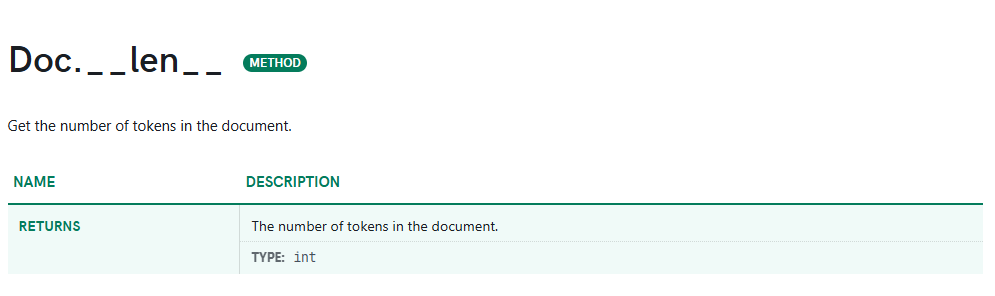

In [8]:
# Incluye aquí el código generado para poder responder a tu pregunta
print(f"{len(doc)}")

20


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
 

### Respuesta 1 

Existen 20 registros en el corpus, estos fueron limitados por la variable lines_number, si bien este no es el total de datos dentro del archivo csv para este caso si esta limitado por dicha variable para la lectura del dataframe.

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 2.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Cuántas palabras totales hay en los comentarios del corpus?</span>

In [9]:
def count_words(doc,type):   
    total_comentarios_corpus = 0
    for comentario in doc:
        contador_palabras_comentario = 0
        for token in comentario:
            if not token.is_punct and not token.is_space:
                 contador_palabras_comentario += 1
        total_comentarios_corpus += contador_palabras_comentario
        # print(f"Comentario: '{comentario.text}' - Palabras: {contador_palabras_comentario}")
    print(f"\nTotal de palabras en todos los comentarios: {total_comentarios_corpus}")
    
    if type == 'totales':
        return total_comentarios_corpus
    if type == 'promedio':
        return total_comentarios_corpus/len(doc)

total_comentarios_corpus = count_words(doc,'totales')



Total de palabras en todos los comentarios: 1327


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
 

### Respuesta 2
Mi respuesta para este punto son 1327 palabras totales para el corpus teniendo en cuenta que el corpus en este caso cuenta con 20 lineas, ya que se realizo el conteo de palabras por comentario y ademas de eso se realizo la suma de todas las palabras pertenecientes al doc. Para realizar el conteo de la cantidad de palabras de los comentarios dentro del doc se tuvo en cuenta los tokens que existian dentro de cada comentario (excepto los signos de puntuacion y los espacios). 

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 3.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Cuál el número promedio de palabras en cada comentario?</span>

In [10]:
# Incluye aquí el código generado para poder responder a tu pregunta
tamaño_doc = len(doc)
promedio_palabras = count_words(doc,'promedio')
print(f"Promedio de palabras en cada comentario: {promedio_palabras} palabras/comentario \n Cantidad de Comentarios: {tamaño_doc} \n Total de palabras en los comentarios: {total_comentarios_corpus}")


Total de palabras en todos los comentarios: 1327
Promedio de palabras en cada comentario: 66.35 palabras/comentario 
 Cantidad de Comentarios: 20 
 Total de palabras en los comentarios: 1327


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
 

### Respuesta 3

Tras haber obtenido la cantidad de comentarios del corpus y la cantidad de palabras de los comentarios, se procede a realizar una division que indica la media o valor promedio de las palabras por cada comentario, en este caso al dividir 1327 entre 20, se obtiene un valor promedio de 66.35 palabras por comentario, cosa que no es del todo cierta, porque como se puede ver en los conteos de cada comentario algunos tienen una pequeña cantidad de palabras mientras que otros simplemente tienen muchas palabras, lo que vuelve la muestra bastante irregular y le genera una gran desviacion estandar. Esto significa que el promedio no representa bien la variabilidad real en el número de palabras por comentario.

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 4.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio) ¿Cuál el número promedio de palabras en los comentarios de cada grupo?</span>

In [11]:
# Incluye aquí el código generado para poder responder a tu pregunta
df_odio = data[data['INTENSIDAD'] > 0]
df_sin_odio = data[data['INTENSIDAD'] == 0]

def doc_generation(df_data):
     doc = []
     value = []
     for i in range(0, len(df_data)):
          tmp_doc = nlp(df_data['CONTENIDO A ANALIZAR'].iloc[i])
          doc.append(tmp_doc)
          tmp_value = df_data["INTENSIDAD"].iloc[i]
          value.append(tmp_value)
     return doc

print("---------------- Datos con Odio:")
doc1 = doc_generation(df_odio)
print(doc1)
promedio_odio = count_words(doc1,'promedio')
print(f'Promedio de palabras en los comentarios de odio {promedio_odio}.')

print("---------------- Datos sin Odio:")
doc2 = doc_generation(df_sin_odio)
promedio_sin_odio = count_words(doc2,'promedio')
print(f'Promedio de palabras en los comentarios de odio {promedio_sin_odio}.')


---------------- Datos con Odio:
[el barça nunca acaeza ante un segundo b ni ante un tercera , ya estan los arbitros para impedirlo....lo de messi es una autentica vergüenza, cristina cifuentes podría haber sido la presidenta de madrid que todavía añoran los madrileños, a la vista de lo que es ayuso. podría haber llegado a ser la presidenta del pp, de madrid, por supuesto, pero a nivel estatal quizás también. pero su mala cabeza hundió su futuro político en el fango, de donde es imposible regresar. qué necesidad tenía de demostrar que había sacado un máster, si ni siquiera casado lo tiene. urdió un plan, con amenazas y abuso de poder, para falsificar un documento oficial, penado con cárcel, que no necesitaba para su carrera política. y para rematar el desastre le pillaron hurtando unas cremas faciales que podría haber pagado tranquilamente, pero su cleptomanía oculta y la cámara indiscreta la destrozaron. una vergüenza de libro., habría que reabrir el caso. el supremo se dedica a prote

<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
 

### Respuesta 4 

Lo primero que se hizo fue realizar el conteo de los comentarios para los dos diferentes dataframes (con odio y sin odio), tras realizar dicho conteo,  

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 5.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio) ¿Cuál es el número promedio de oraciones en los comentarios de cada grupo?</span>

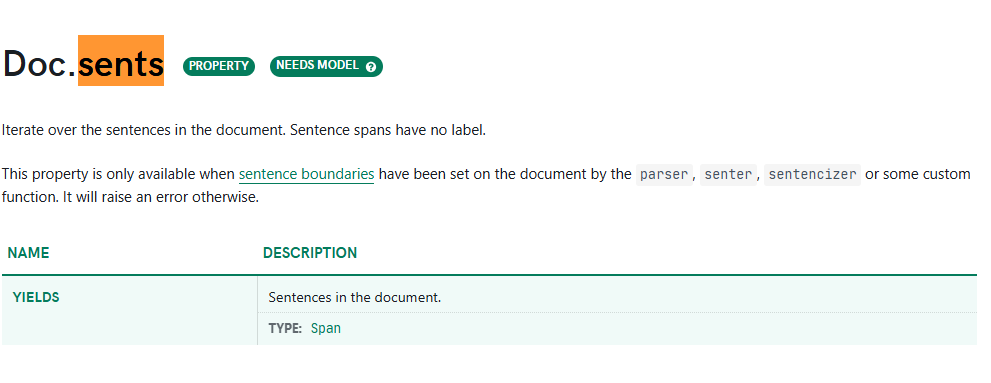

In [12]:
# Incluye aquí el código generado para poder responder a tu pregunta

df_odio = data[data['INTENSIDAD'] > 0]
df_sin_odio = data[data['INTENSIDAD'] == 0]


def contador_oraciones(comentarios):
    oraciones_por_comentario = []

    for i in range(0, len(comentarios)):
           doc = nlp(comentarios['CONTENIDO A ANALIZAR'].iloc[i])
           oraciones_por_comentario.append(len(list(doc.sents)))
           print(list(doc.sents)) 
            
    return oraciones_por_comentario

print("---------------- Datos con Odio:")
oraciones_odio = contador_oraciones(df_odio)
print(oraciones_odio)
if oraciones_odio:
    promedio_oraciones_odio = sum(oraciones_odio) / len(oraciones_odio)    
else:
    promedio_oraciones_odio = 0
print(f"Promedio de oraciones en comentarios de odio: {promedio_oraciones_odio}")


print("---------------- Datos sin Odio:")
oraciones_sin_odio = contador_oraciones(df_sin_odio)
print(oraciones_sin_odio)

if oraciones_sin_odio:
    promedio_oraciones_sin_odio = sum(oraciones_sin_odio) / len(oraciones_sin_odio)
else:
    promedio_oraciones_odio = 0

print(f"Promedio de oraciones en comentarios sin odio: {promedio_oraciones_sin_odio}")



---------------- Datos con Odio:
[el barça nunca acaeza ante un segundo b ni ante un tercera , ya estan los arbitros para impedirlo...., lo de messi es una autentica vergüenza]
[cristina cifuentes podría haber sido la presidenta de madrid que todavía añoran los madrileños, a la vista de lo que es ayuso., podría haber llegado a ser la presidenta del pp, de madrid, por supuesto, pero a nivel estatal quizás también., pero su mala cabeza hundió su futuro político en el fango, de donde es imposible regresar., qué necesidad tenía de demostrar que había sacado un máster, si ni siquiera casado lo tiene., urdió un plan, con amenazas y abuso de poder, para falsificar un documento oficial, penado con cárcel, que no necesitaba para su carrera política., y para rematar el desastre le pillaron hurtando unas cremas faciales que podría haber pagado tranquilamente, pero su cleptomanía oculta y la cámara indiscreta la destrozaron., una vergüenza de libro.]
[habría que reabrir el caso., el supremo se ded

<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
 

### Respuesta 5

El numero promedio de oraciones por cada grupo es:

Promedio de oraciones en comentarios de odio: 4.53 oraciones por comentario de odio.
Promedio de oraciones en comentarios sin odio: 3.6 oraciones por comentario de no odio.

Para realizar este analisis se hizo uso del metodo Sents, el cual permite identificar la existencia de oraciones dentro de los dataframes de odio/no odio.


<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 6.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio) ¿Cuál es el porcentaje de comentarios que contienen entidades NER en cada grupo?</span>

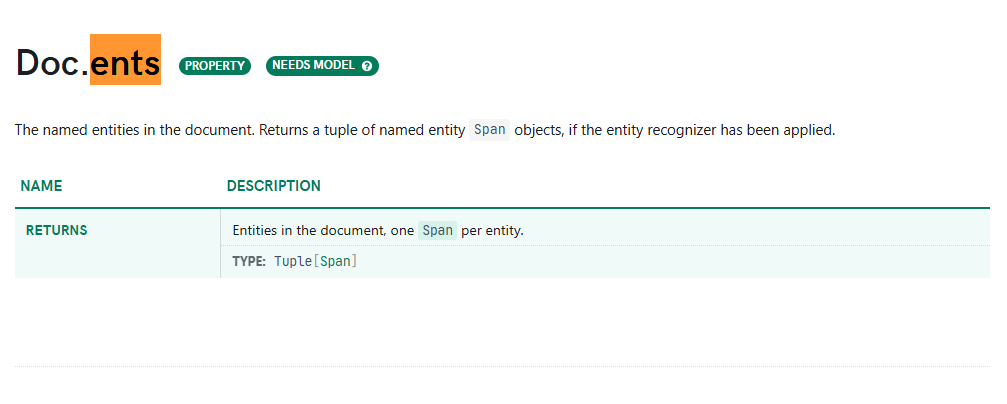

In [26]:
# Incluye aquí el código generado para poder responder a tu pregunta

df_odio = data[data['INTENSIDAD'] > 0]
df_sin_odio = data[data['INTENSIDAD'] == 0]

def contador_NER(comentarios):
    comentarios_NER_conteo = 0
    for i in range(0, len(comentarios)):
           doc = nlp(comentarios['CONTENIDO A ANALIZAR'].iloc[i])
           for ent in doc.ents:
                print(f"Entidad NER: {ent.label_}, Valor: {ent.lemma_}") 
           if(len(doc.ents)>0):
               comentarios_NER_conteo +=1
    
    if len(comentarios) > 0:
        porcentaje = (comentarios_NER_conteo / len(comentarios))*100
    else:
        porcentaje = 0
    return porcentaje

print("---------------- Datos con Odio:")
porcentaje_odio = contador_NER(df_odio)
print(f"Porcentaje de comentarios con entidades en comentarios de odio: {porcentaje_odio:.5f}%")






---------------- Datos con Odio:
Entidad NER: PER, Valor: messi
Entidad NER: PER, Valor: cristín cifuent
Entidad NER: ORG, Valor: pp
Entidad NER: LOC, Valor: madrid
Entidad NER: MISC, Valor: casadete
Entidad NER: ORG, Valor: harvard
Entidad NER: LOC, Valor: aravaca
Entidad NER: LOC, Valor: costa de decir sandez
Entidad NER: PER, Valor: juan carlos i
Entidad NER: LOC, Valor: pp-vox
Entidad NER: LOC, Valor: aravaca
Entidad NER: LOC, Valor: eeuu
Entidad NER: ORG, Valor: pp
Entidad NER: LOC, Valor: comunidad de madrid
Entidad NER: PER, Valor: pablo
Entidad NER: PER, Valor: pedro
Entidad NER: PER, Valor: jesús
Entidad NER: PER, Valor: lancir armstrong
Entidad NER: PER, Valor: falconetti
Entidad NER: PER, Valor: josé manuel franco
Entidad NER: LOC, Valor: madrid
Entidad NER: PER, Valor: aguirre
Entidad NER: LOC, Valor: ca de madrid
Entidad NER: LOC, Valor: madrid
Entidad NER: PER, Valor: josé ignacio gonzález
Entidad NER: LOC, Valor: estepona
Entidad NER: ORG, Valor: pp
Entidad NER: PER, Val

<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
 

### Respuesta 6

El porcentaje de entidades NER en comentarios sin Odio es del 20%

El porcentaje de entidades NER en comentarios con Odio es del 73.33%

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 7.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio) ¿Cuál es el porcentaje de comentarios que contienen entidades NER de tipo PERSON en cada grupo?</span>

In [14]:
# Separar en grupos de odio y sin odio
df_odio = data[data['INTENSIDAD'] > 0]
df_sin_odio = data[data['INTENSIDAD'] == 0]

def filtro_ent_persona(df, tipo_filtro):
    comentarios_con_persona = 0  # Contador de comentarios con entidad 'PERSON'
    total_comentarios = len(df)
    
    for i in range(total_comentarios):
        doc = nlp(df['CONTENIDO A ANALIZAR'].iloc[i])
        # Verificar si el comentario tiene una entidad de tipo 'PERSON'
        for ent in doc.ents:
            if ent.label_ == tipo_filtro:
                 comentarios_con_persona += 1
                 break  # Salir del bucle cuando se encuentra 'PERSON' en el comentario

    # Calcular el porcentaje de comentarios con 'PERSON'
    if total_comentarios > 0:
        return (comentarios_con_persona / total_comentarios) * 100
    else:
        return 0

# Calcular el porcentaje para cada grupo
porcentaje_odio = filtro_ent_persona(df_odio, 'PER')
porcentaje_sin_odio = filtro_ent_persona(df_sin_odio, 'PER')

print(f"Porcentaje de comentarios con entidades 'PERSON' en el grupo de odio: {porcentaje_odio:.2f}%")
print(f"Porcentaje de comentarios con entidades 'PERSON' en el grupo sin odio: {porcentaje_sin_odio:.2f}%")


Porcentaje de comentarios con entidades 'PERSON' en el grupo de odio: 46.67%
Porcentaje de comentarios con entidades 'PERSON' en el grupo sin odio: 20.00%


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
 

### Respuesta 7

Porcentaje de comentarios con entidades 'PERSON' en el grupo de odio: 46.67%

Porcentaje de comentarios con entidades 'PERSON' en el grupo sin odio: 20.00%


<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 8.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio) ¿Cuál es el porcentaje de palabras en cada combinación posible de género y número (p.ej. masculino singular) en cada grupo?</span>

In [15]:
# Incluye aquí el código generado para poder responder a tu pregunta
df_odio = data[data['INTENSIDAD'] > 0]
df_sin_odio = data[data['INTENSIDAD'] == 0]

total_palabras = 0

def contador_genero_numero(df):
    contador = {
        "masculino_singular": 0,
        "masculino_plural": 0,
        "femenino_singular": 0,
        "femenino_plural": 0
    }
    total_palabras = 0  # Contador de palabras con género y número
    for i in range(len(df)):
        doc = nlp(df['CONTENIDO A ANALIZAR'].iloc[i])
        
        for token in doc:
            # Verificar si la palabra tiene tanto género como número
            if token.morph.get("Gender") and token.morph.get("Number"):
                genero = token.morph.get("Gender")[0]
                numero = token.morph.get("Number")[0]

                # Actualizar el contador en función del género y número
                if genero == "Masc" and numero == "Sing":
                    contador["masculino_singular"] += 1
                elif genero == "Masc" and numero == "Plur":
                    contador["masculino_plural"] += 1
                elif genero == "Fem" and numero == "Sing":
                    contador["femenino_singular"] += 1
                elif genero == "Fem" and numero == "Plur":
                    contador["femenino_plural"] += 1

                # Incrementar el total de palabras con género y número
                total_palabras += 1

    return contador, total_palabras

contador_odio, total_palabras_odio = contador_genero_numero(df_odio)
contador_sin_odio, total_palabras_sin_odio = contador_genero_numero(df_sin_odio)

# Calcular los porcentajes
porcentajes_odio = {}

print(contador_odio.items())

for k, v in contador_odio.items():
    
    if total_palabras_odio > 0:
        porcentaje = (v / total_palabras_odio) * 100
    else:
        porcentaje = 0
    porcentajes_odio[k] = porcentaje
    

porcentajes_sin_odio = {}
print(contador_sin_odio.items())

for k, v in contador_sin_odio.items():
    if total_palabras_sin_odio > 0:
        porcentaje = (v / total_palabras_sin_odio) * 100
    else:
        porcentaje = 0
    porcentajes_sin_odio[k] = porcentaje

# Imprimir los resultados
print("Porcentaje de palabras en cada combinación de género y número en el grupo de odio:")
for combinacion, porcentaje in porcentajes_odio.items():
    print(f"{combinacion}: {porcentaje:.2f}%")

print("\nPorcentaje de palabras en cada combinación de género y número en el grupo sin odio:")
for combinacion, porcentaje in porcentajes_sin_odio.items():
    print(f"{combinacion}: {porcentaje:.2f}%")






dict_items([('masculino_singular', 180), ('masculino_plural', 64), ('femenino_singular', 147), ('femenino_plural', 37)])
dict_items([('masculino_singular', 79), ('masculino_plural', 10), ('femenino_singular', 28), ('femenino_plural', 1)])
Porcentaje de palabras en cada combinación de género y número en el grupo de odio:
masculino_singular: 42.06%
masculino_plural: 14.95%
femenino_singular: 34.35%
femenino_plural: 8.64%

Porcentaje de palabras en cada combinación de género y número en el grupo sin odio:
masculino_singular: 66.95%
masculino_plural: 8.47%
femenino_singular: 23.73%
femenino_plural: 0.85%


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
 

### Respuesta 8 

Se realizó la división en cuatro grupos para analizar las posibilidades de género y número. Esto se hizo sin ningún ánimo de ofender a nadie; simplemente, facilita el análisis trabajar con dos géneros sexuales y los dos números existentes: singular y plural.

Para esta respuesta, el 66.95% de las palabras corresponde al masculino singular, el 8.47% al masculino plural, el 23.73% al femenino singular y el 0.85% al femenino plural. Para determinar tanto el género como el número, se utiliza el token de la siguiente manera: token.morph.get("Gender")[0] o token.morph.get("Number")[0]. Estos valores se agregan a un diccionario que tiene como clave la combinación específica de género y número. Allí, se realiza el conteo categórico según la combinación correspondiente.

Posteriormente, se toma el contador y se calcula el análisis porcentual para obtener la respuesta solicitada. Cabe resaltar que este proceso se ejecuta dos veces: una para los datos con odio y otra para los datos sin odio. 👍

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 9.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio), indica cuántas entidades de cada tipo posible se reconocen en cada uno de los grupos</span>

In [16]:
# Incluye aquí el código generado para poder responder a tu pregunta

df_odio = data[data['INTENSIDAD'] > 0]
df_sin_odio = data[data['INTENSIDAD'] == 0]


def ent_por_tipo(df_analizar):
    tipos = {}
    for i in range(0, len(df_analizar)):
           doc = nlp(df_analizar['CONTENIDO A ANALIZAR'].iloc[i])
           for ent in doc.ents:
            if(len(doc.ents)>0):
                if ent.label_ in tipos:
                    tipos[ent.label_]+=1
                else:
                    tipos[ent.label_]=1
    return tipos

tipos_ner_odio = comentarios_conteo = ent_por_tipo(df_odio)
print(f"Entidades de cada tipo posible dentro del dataframe de Odio: {tipos_ner_odio}")

tipos_ner_sin_odio = comentarios_conteo = ent_por_tipo(df_sin_odio)
print(f"Entidades de cada tipo posible dentro del dataframe de datos sin Odio: {tipos_ner_sin_odio}")




Entidades de cada tipo posible dentro del dataframe de Odio: {'PER': 12, 'ORG': 6, 'LOC': 14, 'MISC': 1}
Entidades de cada tipo posible dentro del dataframe de datos sin Odio: {'ORG': 1, 'MISC': 1, 'PER': 2, 'LOC': 1}


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
 

### Respuesta 9

En este punto se obtuvo todas las entidades mediante el atributo doc.ents, los nombres de esas entidades fueron almacenados en un diccionario y se realizo el conteo por cada entidad tanto para los datos con odio y sin odio, se obtuvieron los siguientes resultados:

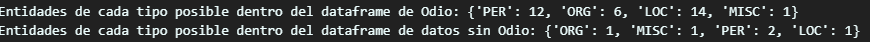

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 10.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio), extrae y muestra los 100 lemas más repetidos en los comentarios de cada grupo</span>

In [34]:
# Filtrar los comentarios en dos grupos: odio y sin odio
df_odio = data[data['INTENSIDAD'] > 0]
df_sin_odio = data[data['INTENSIDAD'] == 0]

def lemas_comunes(df_analizar, mas_repetidos=100):
    frecuencia_lemas = {}
    for i in range(len(df_analizar)):
        doc = nlp(df_analizar['CONTENIDO A ANALIZAR'].iloc[i])
        
        
        for token in doc:
            if not token.is_stop and not token.is_punct:
                lema = token.lemma_
                if lema in frecuencia_lemas:
                    frecuencia_lemas[lema] += 1
                else:
                    frecuencia_lemas[lema] = 1
                    
    lemas_mas_comunes = sorted(frecuencia_lemas.items(), key=lambda x: x[1], reverse=True)[:mas_repetidos]
    return lemas_mas_comunes

# Obtener los 100 lemas más repetidos en cada grupo
lemas_odio = lemas_comunes(df_odio)
lemas_odio_df = pd.DataFrame(lemas_odio, columns=['Lema', 'Frecuencia'])


lemas_sin_odio = lemas_comunes(df_sin_odio)
lemas_sin_odio_df = pd.DataFrame(lemas_sin_odio, columns=['Lema', 'Frecuencia'])

lemas_odio_df


,Lema,Frecuencia
0,presidenta,7
1,madrid,7
2,corrupción,7
3,cifuent,6
4,caso,6
...,...,...
95,tranquilamente,1
96,cleptomanía,1
97,oculto,1
98,cámara,1


In [35]:
lemas_sin_odio_df

,Lema,Frecuencia
0,minuto,4
1,madrid,3
2,partido,3
3,copa,2
4,zidane,2
...,...,...
83,resultado,1
84,señora,1
85,dar,1
86,talla,1


<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
 

### Respuesta 10 

El lema que mas se repite en los lemas con odio es la palabra presidenta.

El lema que mas se repite en los lemas sin odio es la palabra minuto.

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 11.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Es posible utilizar alguna de las características extraídas en las preguntas anteriores para determinar si un mensaje contiene odio? Justifica tu respuesta con el análisis estadístico que consideres necesario.</span>

<b>Incluye aquí, debajo de la línea, la explicación de tu respuesta</b>
<hr>
 

### Respuesta 11

Si, es posible saber que mensajes tienen odio y que mensajes no. Esto se puede realizar mediante el uso de analisis del dataframe. Si bien ya se sabe que la columna de intensidad define la presencia o no de odio. Tambien hay una manera categorica de clasificar los comentarios con odio y esto es mediante el uso de las columnas "TONO HUMORISTICO" y "TIPO DE ODIO".

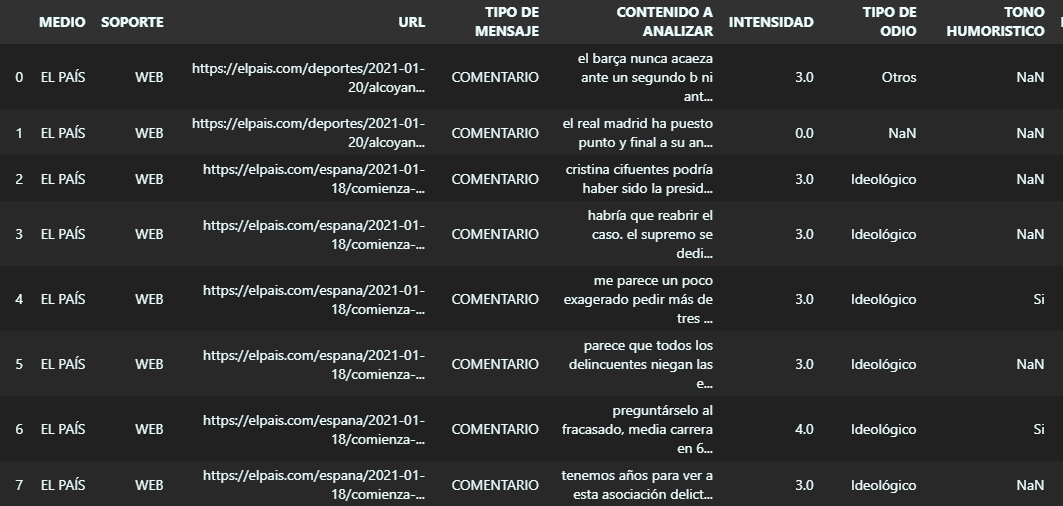



Se podria entonces evidenciar que al hacer el sort por la columna tipo de odio. Se obtienen los siguientes resultados. 

In [19]:
data_for_analysis = data.iloc[:, :8]
data_for_analysis.sort_values(by='INTENSIDAD', ascending=False)

,MEDIO,SOPORTE,URL,TIPO DE MENSAJE,CONTENIDO A ANALIZAR,INTENSIDAD,TIPO DE ODIO,TONO HUMORISTICO
13,EL PAÍS,WEB,https://elpais.com/espana/2021-01-22/cristina-...,COMENTARIO,¿la de falconetti acaso?,4.0,Ideológico,Si
11,EL PAÍS,WEB,https://elpais.com/espana/2021-01-18/comienza-...,COMENTARIO,y ahora esa misma profesora hace esas declarac...,4.0,"Misoginia, Ideológico",NaN
8,EL PAÍS,WEB,https://elpais.com/espana/2021-01-18/comienza-...,COMENTARIO,"una ""fardera"" como presidenta de la comunidad ...",4.0,Ideológico,NaN
6,EL PAÍS,WEB,https://elpais.com/espana/2021-01-18/comienza-...,COMENTARIO,"preguntárselo al fracasado, media carrera en 6...",4.0,Ideológico,Si
14,EL PAÍS,WEB,https://elpais.com/espana/2021-01-22/cristina-...,COMENTARIO,¿no ha entendido ud. que este juicio es por fa...,4.0,Ideológico,NaN
3,EL PAÍS,WEB,https://elpais.com/espana/2021-01-18/comienza-...,COMENTARIO,habría que reabrir el caso. el supremo se dedi...,3.0,Ideológico,NaN
2,EL PAÍS,WEB,https://elpais.com/espana/2021-01-18/comienza-...,COMENTARIO,cristina cifuentes podría haber sido la presid...,3.0,Ideológico,NaN
0,EL PAÍS,WEB,https://elpais.com/deportes/2021-01-20/alcoyan...,COMENTARIO,el barça nunca acaeza ante un segundo b ni ant...,3.0,Otros,NaN
10,EL PAÍS,WEB,https://elpais.com/espana/2021-01-18/comienza-...,COMENTARIO,"viéndolo en directo, por si acaso, cualquiera ...",3.0,Otros,NaN
5,EL PAÍS,WEB,https://elpais.com/espana/2021-01-18/comienza-...,COMENTARIO,parece que todos los delincuentes niegan las e...,3.0,Ideológico,NaN


Se observa que no hay una relación directa entre el tipo de odio y su intensidad. No obstante, podemos identificar si un mensaje contiene odio o no. Una alternativa para lograr esto es analizar las palabras o tokens de la columna "contenido a analizar". Al combinar este análisis con las otras dos columnas, se pueden aplicar métodos como el cálculo del promedio (sum), la extracción del número gramatical (token.morph.get("Number")[0]) y el género gramatical (token.morph.get("Gender")[0]). Esto permite determinar el tipo de odio presente, ya sea relacionado con cuestiones de género, dirigido hacia un colectivo, o enfocado en una persona, animal o entidad específica.